## Implementando uma Função Lógica XOR com Redes Neurais

#### Criando uma rede neural via pybrain para a estrutura de condição lógica XOR.

![porta-and](Imagens/xor.jpg)

In [1]:
# importando as funções da biblioteca pybrain do python
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer
from pybrain.structure.modules import LinearLayer

In [2]:
# definindo uma rede neural com 2 neurônios na camada de entrada, 3 na camada oculta e 1 na camada de saída
# usando o melhoramento 'LinearLayer' na função de ativação das camadas ocultas
# usando o melhoramento 'SigmoidLayer' na função de ativação da camada de saída
rede = buildNetwork(2, 3, 1, hiddenclass = SigmoidLayer, outclass = LinearLayer)

In [3]:
# definindo uma base de dados com 2 entradas nos atributos previsores e 1 saída no atributo meta
base = SupervisedDataSet(2, 1)

In [4]:
# adicionando o primeiro dado para o treinamento da base de dados
base.addSample((0,0), (0, ))
# adicionando o segundo dado para o treinamento da base de dados
base.addSample((0,1), (1, ))
# adicionando o terceiro dado para o treinamento da base de dados
base.addSample((1,0), (1, ))
# adicionando o quarto dado para o treinamento da base de dados
base.addSample((1,1), (0, ))
# observe que os dados obedecem ao estilo da estrutura de condição lógica XOR

In [5]:
# visualizando os atributos previsores da base de treinamento
print(base['input'])

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [6]:
# visualizando os atributos meta da base de treinamento
print(base['target'])

[[0.]
 [1.]
 [1.]
 [0.]]


In [7]:
# definindo o objeto de treinamento para a base de dados criada
# a taxa de aprendizagem será de 0.01
# o momentum será de 0.06
treinamento = BackpropTrainer(rede, dataset = base, learningrate = 0.01)

In [8]:
# criando uma lista para plotar um gráfico para a taxa de erro do algoritmo
eixoX = list()
eixoY = list()

In [9]:
# estrutura de repetição para realizar o treinamento da rede neural 30000 vezes
for indice in range(1, 5000):
    # fazendo o treinamento com a base de dados criada
    erro = treinamento.train()
    eixoX.append(indice - 1)
    eixoY.append(erro)
    # mostra a taxa de erro a cada 1000 repetições
    if indice % 1000 == 0:
        print('Erro: {}'.format(erro))

Erro: 0.11092051802797132
Erro: 0.08095820034849047
Erro: 0.04609405429518577
Erro: 0.016790205598980236


In [10]:
# visualizando a capacidade de predição do algoritmo
print(rede.activate([0, 0])) # saída esperada: próximo de 0
print(rede.activate([1, 0])) # saída esperada: próximo de 1
print(rede.activate([0, 1])) # saída esperada: próximo de 1
print(rede.activate([1, 1])) # saída esperada: próximo de 0

[0.05198646]
[0.91934907]
[0.91955204]
[0.11426859]


In [11]:
# importando a biblioteca de funções matplotlib do Python
import matplotlib.pyplot as plt

Text(0, 0.5, 'Erro')

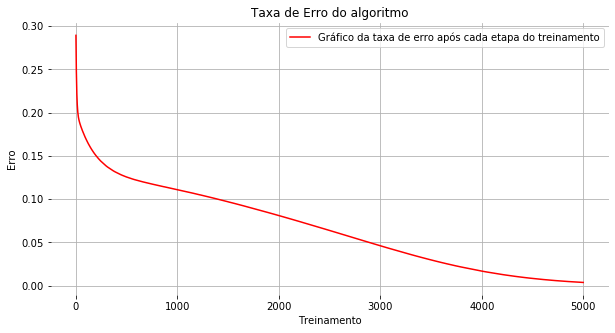

In [12]:
# definindo as dimensões do gráfico
plt.figure(figsize = (10,5))
# plotando o gráfico da taxa de erro durante cada treinamento
plt.plot(eixoX, eixoY, color = "Red", label = "Gráfico da taxa de erro após cada etapa do treinamento")
# plotando o título do gráfico
plt.title("Taxa de Erro do algoritmo")
# adicionando uma grade ao gráfico
plt.grid(True)
# removendo a moldura do gráfico
plt.box(False)
# adicionando as legendas do gráfico
plt.legend()
# adicionando uma legenda ao eixo x
plt.xlabel("Treinamento")
# adicionando uma legenda ao eixo y
plt.ylabel("Erro")